In [ ]:
# !pip install -q itext2kg
# First, upgrade langchain-core to latest (required for langchain-ollama)
!pip install --upgrade langchain-core langchain

# Install langchain-ollama (requires langchain-core >= 0.3.x)
!pip install --upgrade langchain-ollama

!pip install -q langchain langchain-community
!pip install -q networkx matplotlib pyvis
!pip install -q pandas
# New package with structured output support
# !pip install scipy
# !pip install "numpy<2.0"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.4/476.4 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.80
    Uninstalling langchain-core-0.3.80:
      Successfully uninstalled langchain-core-0.3.80
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.27
    Uninstalling langchain-0.3.27:
      Successfully uninstalled langchain-0.3.27
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
itext2kg 1.0.0 requires langchain<0.4.0,>=0.3.26, but you have langchain 1.2.0 which is incompatible.
itext2kg 1.0.0 requires langchain-core<0.4.0,>=0.3.69, but you have langchain-core 1.2.3 which is incompatible.
langchain-openai 0.2.14 requires langchain-core<0.4.0,>=0.3.27, but you have langchain-core 1.2

In [ ]:
# !pip install langchain-ollama

In [ ]:
# Force uninstall numpy and reinstall with correct version
!pip uninstall numpy scipy -y
!pip cache purge
!pip install "numpy<2.0" --force-reinstall --no-cache-dir
!pip install scipy --force-reinstall --no-cache-dir
!pip install itext2kg --force-reinstall --no-cache-dir

print("✅ Installation complete!")
print("⚠️  NOW GO TO: Runtime > Restart session")
print("⚠️  Then skip this cell and run from Cell 2")

In [ ]:
# curl -fsSL https://ollama.com/install.sh | sh
# ollama pull qwen2.5:32b
# ollama serve & ollama run qwen2.5:32b & ollama pull nomic-embed-text

In [ ]:
# # Fix numpy version compatibility (downgrade to <2.0 for scipy/itext2kg compatibility)
# # Note: If this cell fails after installation, please restart the runtime (Runtime > Restart session) and run this cell again.


# import os
# import json
# from pathlib import Path
# from typing import List, Dict, Any
# from dataclasses import dataclass, asdict
# import re

# # Docling imports
# # from docling.document_converter import DocumentConverter

# # LangChain imports for Ollama
# from langchain_community.llms import Ollama
# from langchain_community.embeddings import OllamaEmbeddings
# from langchain_community.chat_models import ChatOllama

# # itext2kg imports
# from itext2kg.atom import Atom

# # Visualization
# import networkx as nx
# import matplotlib.pyplot as plt
# from pyvis.network import Network
# import pandas as pd

# print("✓ All libraries imported successfully")

✓ All libraries imported successfully


In [ ]:
# Fix numpy version compatibility (downgrade to <2.0 for scipy/itext2kg compatibility)
# IMPORTANT: After first run, restart runtime (Runtime > Restart session) and run again

import os
import json
from pathlib import Path
from typing import List, Dict, Any
from dataclasses import dataclass, asdict
import re

# CRITICAL: Use langchain_ollama (NOT langchain_community) for structured output support
# Verify we're importing from the correct package
try:
    from langchain_ollama import ChatOllama, OllamaEmbeddings
    print("✓ Using langchain_ollama (correct package with structured output support)")
    print(f"  ChatOllama module: {ChatOllama.__module__}")
except ImportError as e:
    print(f"❌ Failed to import from langchain_ollama: {e}")
    print("   Run: !pip install langchain-ollama")
    raise

# Verify it's the right module (should be 'langchain_ollama.chat_models')
assert 'langchain_ollama' in ChatOllama.__module__, \
    f"Wrong ChatOllama! Got {ChatOllama.__module__}, expected langchain_ollama"

# itext2kg imports
from itext2kg.atom import Atom

# Visualization
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import pandas as pd

print("✓ All libraries imported successfully")

✓ Using langchain_ollama (correct package with structured output support)
  ChatOllama module: langchain_ollama.chat_models
✓ All libraries imported successfully


## prepare for all chunks


In [ ]:
import json
import os
from types import SimpleNamespace

# Define the target filename
filename = "all_chunks.json"

# List of possible paths to check
possible_paths = [
    f"content/{filename}",  # Original path
    filename,               # Current directory
    f"/content/{filename}", # Absolute path in Colab
]

json_path = None
for path in possible_paths:
    if os.path.exists(path):
        json_path = path
        print(f"✅ Found file at: {json_path}")
        break

if json_path is None:
    print(f"⚠️ File '{filename}' not found in paths: {possible_paths}")
    print("ℹ️ Creating a dummy file for demonstration purposes...")

    # Create dummy data matching the expected structure
    dummy_data = [
        {
            "id": "chunk_001",
            "section_title": "Abstract",
            "content": "This is a dummy chunk of text to simulate the content of a document. It serves as a placeholder when the actual JSON file is missing.",
            "metadata": {"doc_name": "dummy_document.pdf", "page": 1}
        },
        {
            "id": "chunk_002",
            "section_title": "Introduction",
            "content": "The introduction section outlines the purpose of this study. This is the second atomic fact derived from the dummy data.",
            "metadata": {"doc_name": "dummy_document.pdf", "page": 1}
        }
    ]

    json_path = filename
    with open(json_path, 'w', encoding='utf-8') as f:
        json.dump(dummy_data, f, indent=2)
    print(f"✅ Created dummy file at: {json_path}")

# Load the JSON file
with open(json_path, 'r', encoding='utf-8') as f:
    chunks_data = json.load(f)

# Convert dictionaries to objects with dot notation access
all_chunks = [SimpleNamespace(**chunk) for chunk in chunks_data]

print(f"Loaded {len(all_chunks)} chunks from JSON")
if all_chunks:
    print(f"Sample chunk ID: {all_chunks[0].id}")
    print(f"Sample section: {all_chunks[0].section_title}")

✅ Found file at: all_chunks.json
Loaded 26 chunks from JSON
Sample chunk ID: robotic for resilient supply chain_chunk_2_0
Sample section: 1   |   Introduction


In [ ]:
# Prepare atomic facts from chunks
# In ATOM, each chunk is treated as an atomic fact with observation timestamp

import datetime

# You can customize observation timestamps based on your use case
# For this example, we'll use the current date
current_timestamp = datetime.datetime.now().strftime("%Y-%m-%d")

# Create atomic facts dictionary
atomic_facts_dict = {}

for chunk in all_chunks:
    # Use chunk content as atomic fact
    fact_text = f"[{chunk.section_title}] {chunk.content}"

    # Group by document or use same timestamp for all
    doc_name = chunk.metadata.get('doc_name', 'unknown')

    if current_timestamp not in atomic_facts_dict:
        atomic_facts_dict[current_timestamp] = []

    atomic_facts_dict[current_timestamp].append(fact_text)

print(f"Prepared {sum(len(facts) for facts in atomic_facts_dict.values())} atomic facts")
print(f"Observation timestamps: {list(atomic_facts_dict.keys())}")
print(f"\nSample fact: {atomic_facts_dict[current_timestamp][0][:200]}...")

Prepared 26 atomic facts
Observation timestamps: ['2025-12-19']

Sample fact: [1   |   Introduction] Economic globalization is currently facing considerable challenges, with an increase in trade protectionism and substantial shifts in the global governance system (Guedhami et a...


## initializing the Models


In [ ]:
# Initialize Ollama models for LangChain
print("Initializing Ollama models...")

# Chat model for KG construction
llm = ChatOllama(
    # model="llama3.1:8b",
    model = "qwen2.5:32b",
    temperature=0,
    base_url="http://localhost:11434"
)

# Embeddings model for entity/relation matching
embeddings = OllamaEmbeddings(
    model="nomic-embed-text",
    base_url="http://localhost:11434"
)

print("✓ Models initialized successfully")

# Test the models
print("\nTesting LLM...")
test_response = llm.invoke("Say 'ready' if you can respond.")
print(f"LLM Response: {test_response.content}")

print("\nTesting embeddings...")
test_embedding = embeddings.embed_query("test")
print(f"Embedding dimension: {len(test_embedding)}")
print("\n✓ All models working correctly")

Initializing Ollama models...
✓ Models initialized successfully

Testing LLM...
LLM Response: Ready.

Testing embeddings...
Embedding dimension: 768

✓ All models working correctly


In [ ]:
# try:
#     from langchain_ollama import ChatOllama, OllamaEmbeddings
#     print("✓ Using langchain_ollama (correct package with structured output support)")
#     print(f"  ChatOllama module: {ChatOllama.__module__}")
# except ImportError as e:
#     print(f"❌ Failed to import from langchain_ollama: {e}")
#     print("   Run: !pip install langchain-ollama")
#     raise

## initialize the atom


In [ ]:
# Fix for nested async event loops in Colab/Jupyter
# This allows running async code when an event loop is already running
!pip install -q nest_asyncio

import nest_asyncio
nest_asyncio.apply()

print("✓ nest_asyncio applied - async calls now work in Colab/Jupyter")

✓ nest_asyncio applied - async calls now work in Colab/Jupyter


In [ ]:
# Initialize ATOM
print("Initializing ATOM for Knowledge Graph construction...\n")

atom = Atom(
    llm_model=llm,
    embeddings_model=embeddings
)

print("✓ ATOM initialized")
print("\nBuilding Knowledge Graph...")
print("This may take several minutes depending on the number of chunks...\n")

# Build the knowledge graph
# Note: ATOM's build_graph_from_different_obs_times is async
import asyncio

# For Colab, we need to handle async properly
try:
    # Try to get existing event loop
    loop = asyncio.get_event_loop()
except RuntimeError:
    # Create new event loop if none exists
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)

# Build KG with custom thresholds
kg = await atom.build_graph_from_different_obs_times(
    atomic_facts_with_obs_timestamps=atomic_facts_dict,
    ent_threshold=0.8,      # Entity similarity threshold
    rel_threshold=0.7,      # Relation similarity threshold
    max_workers=4           # Parallel processing workers
)

print("\n✓ Knowledge Graph constructed successfully!")

Initializing ATOM for Knowledge Graph construction...

[2025-12-19 16:30:32] [ WARNING] [itext2kg.llm_output_parsing.langchain_output_parser] ⚠️  Could not auto-detect provider from model: chatollama
[2025-12-19 16:30:32] [ WARNING] [itext2kg.llm_output_parsing.langchain_output_parser]    Module: langchain_ollama.chat_models
[2025-12-19 16:30:32] [ WARNING] [itext2kg.llm_output_parsing.langchain_output_parser]    Using conservative defaults for unknown provider
[2025-12-19 16:30:32] [    INFO] [itext2kg.llm_output_parsing.langchain_output_parser] 🔍 Detected LLM Provider: Unknown
[2025-12-19 16:30:32] [    INFO] [itext2kg.llm_output_parsing.langchain_output_parser] 📊 Rate Limiting Config: 5 requests/batch, 4000 tokens/batch
✓ ATOM initialized

Building Knowledge Graph...
This may take several minutes depending on the number of chunks...

[2025-12-19 16:30:32] [    INFO] [itext2kg.itext2kg.atom.atom] ------- Extracting Quintuples---------
[2025-12-19 16:30:35] [    INFO] [itext2kg.llm_ou

In [ ]:
# kg

## 7. Visualize and Analyze Knowledge Graph

In [ ]:
# # Analyze the knowledge graph
# print("="*60)
# print("KNOWLEDGE GRAPH STATISTICS")
# print("="*60)

# # Get graph structure
# nodes = kg.get('nodes', [])
# edges = kg.get('edges', [])

# print(f"Total Nodes (Entities): {len(nodes)}")
# print(f"Total Edges (Relations): {len(edges)}")

# # Analyze node types
# node_types = {}
# for node in nodes:
#     node_type = node.get('type', 'unknown')
#     node_types[node_type] = node_types.get(node_type, 0) + 1

# print(f"\nNode Types:")
# for ntype, count in sorted(node_types.items(), key=lambda x: x[1], reverse=True):
#     print(f"  {ntype}: {count}")

# # Analyze relation types
# relation_types = {}
# for edge in edges:
#     rel_type = edge.get('relation', 'unknown')
#     relation_types[rel_type] = relation_types.get(rel_type, 0) + 1

# print(f"\nTop 10 Relation Types:")
# for rel, count in sorted(relation_types.items(), key=lambda x: x[1], reverse=True)[:10]:
#     print(f"  {rel}: {count}")

# # Sample entities
# print(f"\nSample Entities:")
# for node in nodes[:5]:
#     print(f"  - {node.get('label', node.get('id', 'N/A'))}")

# print("="*60)

In [ ]:
# Analyze the knowledge graph
print("="*60)
print("KNOWLEDGE GRAPH STATISTICS")
print("="*60)

# KnowledgeGraph is a Pydantic model with .entities and .relationships attributes
# NOT a dictionary, so we access them directly as properties
entities = kg.entities  # List of Entity objects
relationships = kg.relationships  # List of Relationship objects

print(f"Total Nodes (Entities): {len(entities)}")
print(f"Total Edges (Relations): {len(relationships)}")

# Analyze node types/labels
node_labels = {}
for entity in entities:
    label = getattr(entity, 'label', 'unknown')
    node_labels[label] = node_labels.get(label, 0) + 1

print(f"\nEntity Labels:")
for label, count in sorted(node_labels.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {label}: {count}")

# Analyze relation types
relation_types = {}
for rel in relationships:
    rel_name = getattr(rel, 'name', 'unknown')
    relation_types[rel_name] = relation_types.get(rel_name, 0) + 1

print(f"\nTop 10 Relation Types:")
for rel, count in sorted(relation_types.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {rel}: {count}")

# Sample entities
print(f"\nSample Entities:")
for entity in entities[:5]:
    name = getattr(entity, 'name', 'N/A')
    label = getattr(entity, 'label', 'N/A')
    print(f"  - {name} ({label})")

# Sample relationships
print(f"\nSample Relationships:")
for rel in relationships[:5]:
    start = getattr(rel.startEntity, 'name', 'N/A') if hasattr(rel, 'startEntity') else 'N/A'
    end = getattr(rel.endEntity, 'name', 'N/A') if hasattr(rel, 'endEntity') else 'N/A'
    rel_name = getattr(rel, 'name', 'N/A')
    print(f"  - {start} --[{rel_name}]--> {end}")

print("="*60)

KNOWLEDGE GRAPH STATISTICS
Total Nodes (Entities): 211
Total Edges (Relations): 277

Entity Labels:
  publication: 16
  variable: 7
  page_range: 4
  volume: 4
  doi: 4
  method: 3
  zhang: 3
  study: 3
  impact_evaluation: 3
  journal: 3

Top 10 Relation Types:
  authored: 52
  have_positive_impact_on: 14
  includes: 13
  moderates: 9
  improves: 9
  uses_data_from: 8
  indicates: 8
  promotes: 8
  evaluates: 8
  has_control_variable: 8

Sample Entities:
  - fdr (fdr) indicator (foreign_direct_investment_ratio_indicator)
  - fixed effects regression (methodology)
  - development of enterprises (development_of_enterprises)
  - johnson neyman method (method)
  - active management, long term strategic vision, agile decision making (aspect)

Sample Relationships:
  - table 1   descriptive statistics --[includes]--> robot penetration (robot) indicator
  - table 1   descriptive statistics --[includes]--> size (size) indicator
  - table 1   descriptive statistics --[includes]--> age (age) in

In [ ]:
# # Create interactive visualization with PyVis
# def visualize_kg_interactive(kg_data, output_file='kg_visualization.html', max_nodes=100):
#     """Create interactive KG visualization."""

#     net = Network(height='750px', width='100%',
#                   bgcolor='#222222', font_color='white',
#                   notebook=True)

#     # Configure physics
#     net.force_atlas_2based()

#     nodes = kg_data.get('nodes', [])[:max_nodes]
#     edges = kg_data.get('edges', [])

#     # Add nodes
#     node_ids = set()
#     for node in nodes:
#         node_id = node.get('id')
#         node_label = node.get('label', node_id)
#         node_ids.add(node_id)

#         net.add_node(
#             node_id,
#             label=node_label[:50],  # Truncate long labels
#             title=f"{node_label}\nType: {node.get('type', 'N/A')}",
#             color='#00ff1e'
#         )

#     # Add edges (only for nodes we included)
#     for edge in edges:
#         source = edge.get('source')
#         target = edge.get('target')

#         if source in node_ids and target in node_ids:
#             relation = edge.get('relation', '')

#             net.add_edge(
#                 source,
#                 target,
#                 title=relation,
#                 label=relation[:20],
#                 color='#ff9999'
#             )

#     # Save and display
#     net.show(output_file)
#     print(f"✓ Interactive visualization saved to {output_file}")
#     return net

# # Create visualization
# vis_net = visualize_kg_interactive(kg, 'kg_visualization.html', max_nodes=150)

# print("\nVisualization is interactive:")
# print("  - Click and drag nodes to move them")
# print("  - Scroll to zoom in/out")
# print("  - Hover over nodes/edges for details")

In [ ]:
# Create interactive visualization with PyVis
def visualize_kg_interactive(kg_obj, output_file='kg_visualization.html', max_nodes=100):
    """Create interactive KG visualization from KnowledgeGraph object."""

    net = Network(height='750px', width='100%',
                  bgcolor='#222222', font_color='white',
                  notebook=True)

    # Configure physics
    net.force_atlas_2based()

    # Get entities and relationships from KnowledgeGraph object
    entities = kg_obj.entities[:max_nodes]
    relationships = kg_obj.relationships

    # Build a set of entity names/ids for the nodes we're including
    node_ids = set()
    entity_map = {}  # Map entity name to entity object

    for entity in entities:
        entity_name = getattr(entity, 'name', str(id(entity)))
        entity_label = getattr(entity, 'label', 'Entity')
        node_ids.add(entity_name)
        entity_map[entity_name] = entity

        net.add_node(
            entity_name,
            label=entity_name[:50],  # Truncate long labels
            title=f"{entity_name}\nLabel: {entity_label}",
            color='#00ff1e'
        )

    # Add edges (only for nodes we included)
    for rel in relationships:
        start_entity = getattr(rel, 'startEntity', None)
        end_entity = getattr(rel, 'endEntity', None)

        if start_entity and end_entity:
            source = getattr(start_entity, 'name', None)
            target = getattr(end_entity, 'name', None)
            rel_name = getattr(rel, 'name', '')

            if source in node_ids and target in node_ids:
                net.add_edge(
                    source,
                    target,
                    title=rel_name,
                    label=rel_name[:20],
                    color='#ff9999'
                )

    # Save and display
    net.show(output_file)
    print(f"✓ Interactive visualization saved to {output_file}")
    return net

# Create visualization
vis_net = visualize_kg_interactive(kg, 'kg_visualization.html', max_nodes=150)

print("\nVisualization is interactive:")
print("  - Click and drag nodes to move them")
print("  - Scroll to zoom in/out")
print("  - Hover over nodes/edges for details")

kg_visualization.html
✓ Interactive visualization saved to kg_visualization.html

Visualization is interactive:
  - Click and drag nodes to move them
  - Scroll to zoom in/out
  - Hover over nodes/edges for details


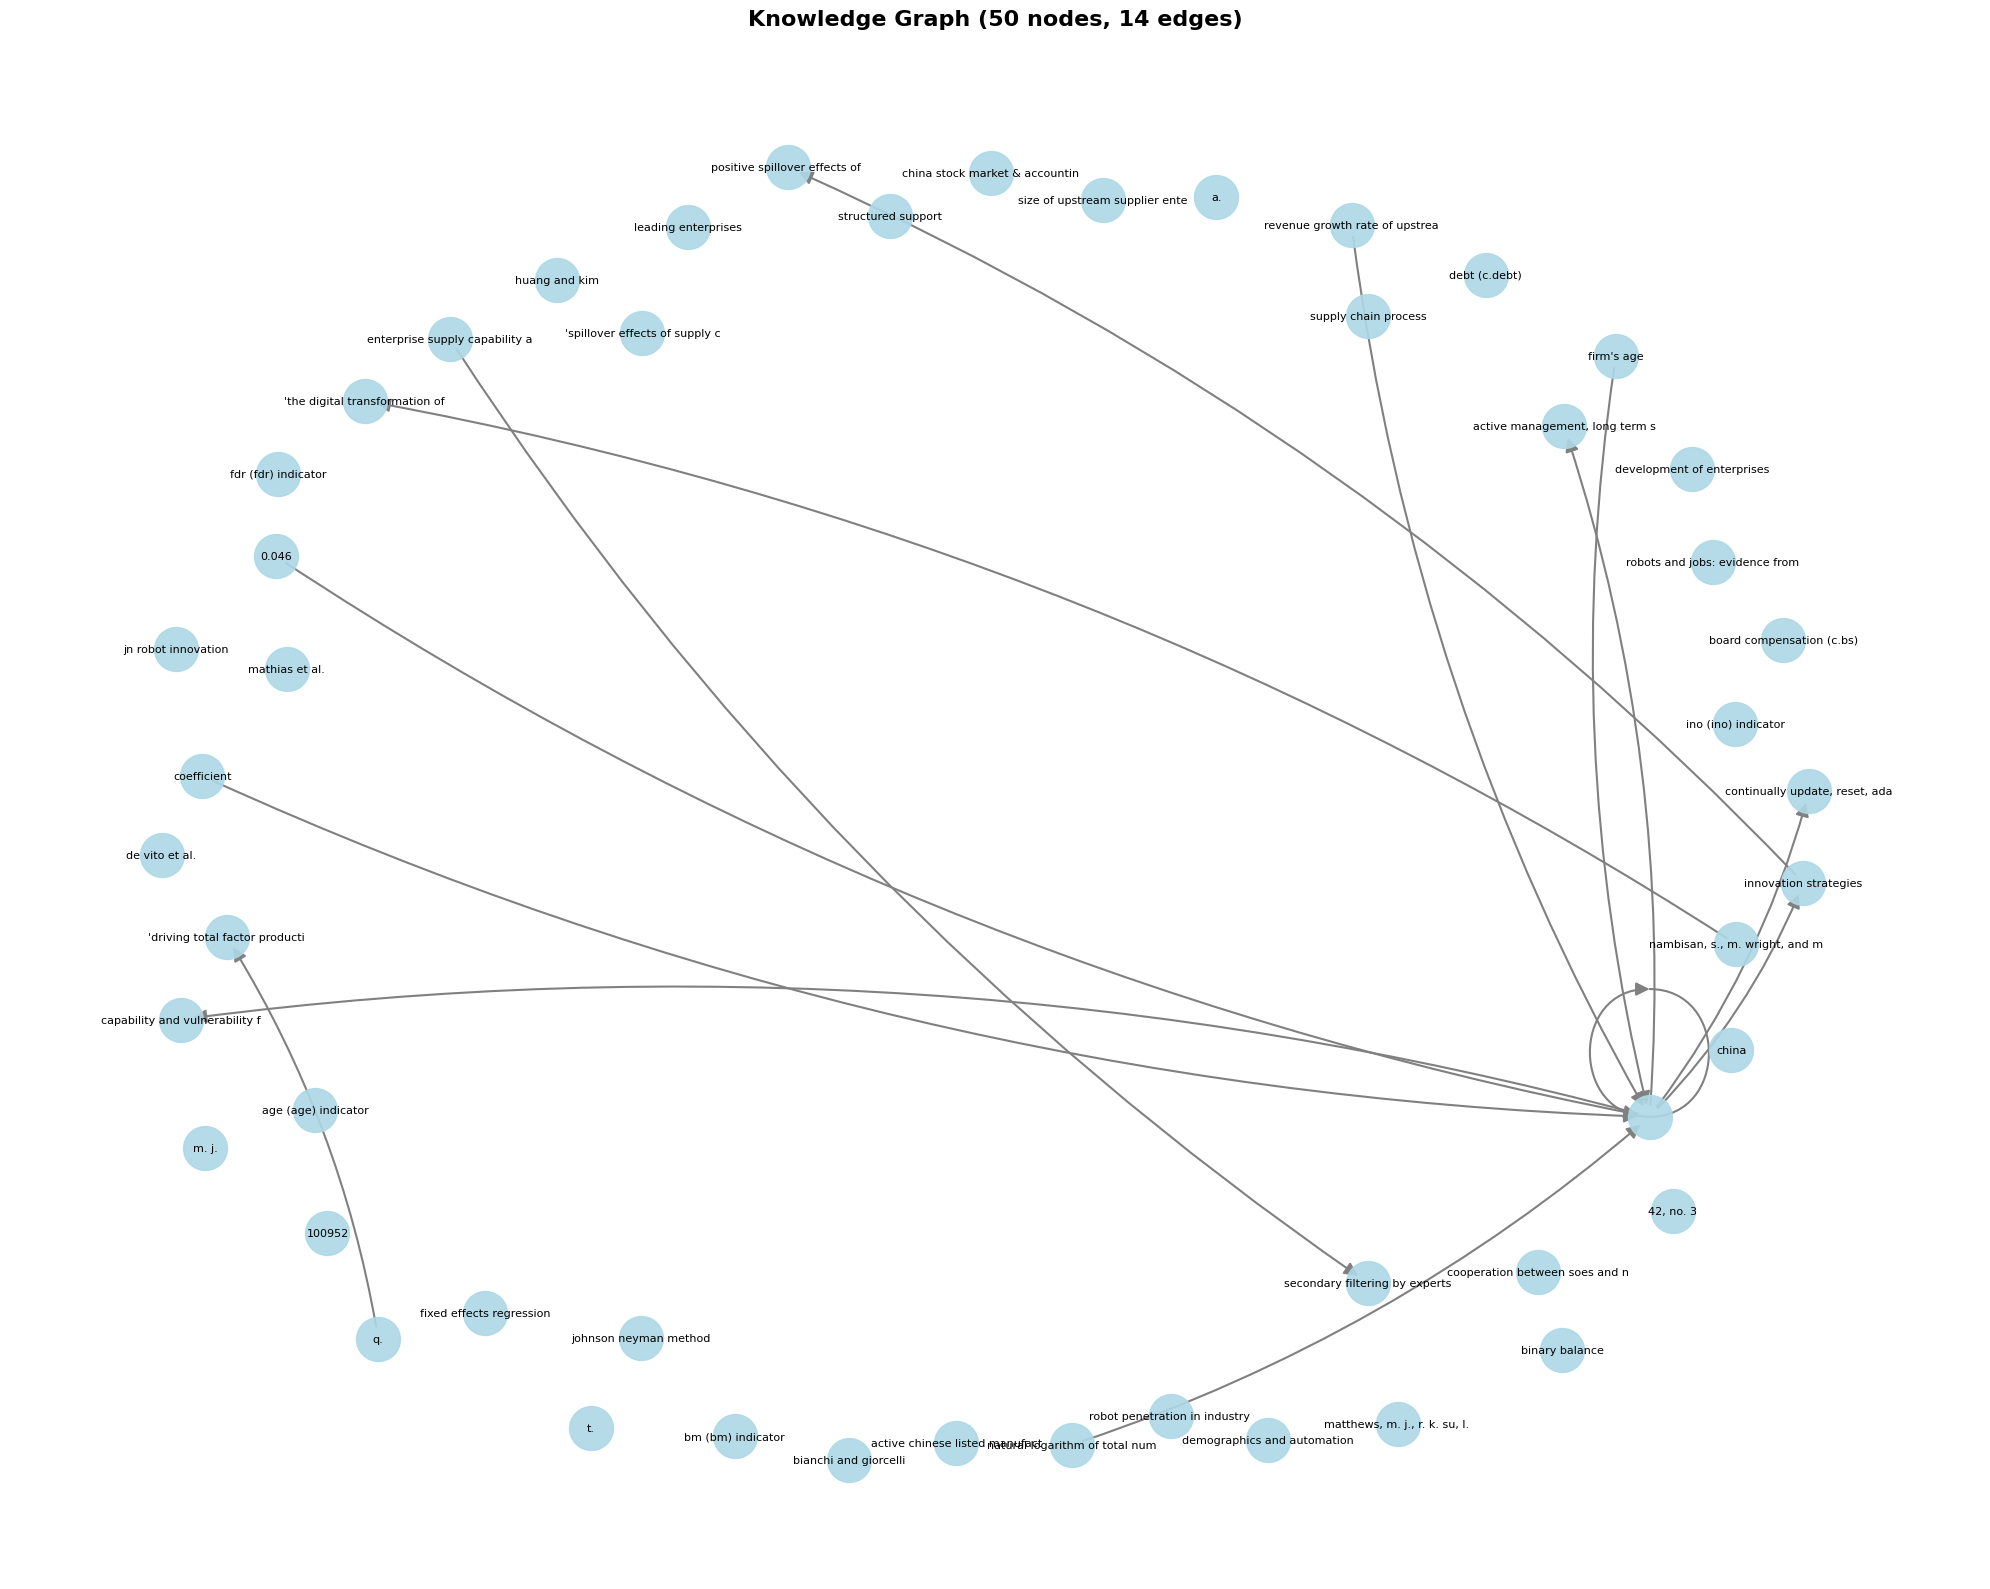

✓ Static visualization saved to kg_static.png


In [ ]:
# Create static visualization with matplotlib
def visualize_kg_static(kg_obj, max_nodes=50):
    """Create static KG visualization from KnowledgeGraph object."""

    G = nx.DiGraph()

    # Get entities and relationships from KnowledgeGraph object
    entities = kg_obj.entities[:max_nodes]
    relationships = kg_obj.relationships

    # Add nodes
    node_ids = set()
    for entity in entities:
        entity_name = getattr(entity, 'name', str(id(entity)))
        entity_label = getattr(entity, 'label', 'Entity')
        G.add_node(entity_name, label=entity_name[:30])
        node_ids.add(entity_name)

    # Add edges
    for rel in relationships:
        start_entity = getattr(rel, 'startEntity', None)
        end_entity = getattr(rel, 'endEntity', None)

        if start_entity and end_entity:
            source = getattr(start_entity, 'name', None)
            target = getattr(end_entity, 'name', None)
            rel_name = getattr(rel, 'name', '')

            if source in node_ids and target in node_ids:
                G.add_edge(source, target, relation=rel_name)

    # Draw
    plt.figure(figsize=(20, 16))
    pos = nx.spring_layout(G, k=2, iterations=50)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                           node_size=1000, alpha=0.9)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray',
                           arrows=True, arrowsize=20, width=1.5,
                           connectionstyle='arc3,rad=0.1')

    # Draw labels
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    plt.title(f"Knowledge Graph ({len(G.nodes())} nodes, {len(G.edges())} edges)",
              fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('kg_static.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"✓ Static visualization saved to kg_static.png")

# Create static visualization
visualize_kg_static(kg, max_nodes=50)

## 8 export to KG Neo4J

In [ ]:
# Export KG in various formats
import datetime
!mkdir -p kg_output

# Helper function to convert KnowledgeGraph to dict format
def kg_to_dict(kg_obj):
    """Convert KnowledgeGraph object to dictionary format for export."""
    nodes = []
    edges = []

    for entity in kg_obj.entities:
        node_dict = {
            'name': getattr(entity, 'name', ''),
            'label': getattr(entity, 'label', ''),
        }
        # Add any additional properties
        if hasattr(entity, 'properties') and entity.properties:
            props = entity.properties
            if hasattr(props, 'embeddings') and props.embeddings is not None:
                node_dict['has_embeddings'] = True
        nodes.append(node_dict)

    for rel in kg_obj.relationships:
        start_entity = getattr(rel, 'startEntity', None)
        end_entity = getattr(rel, 'endEntity', None)

        edge_dict = {
            'source': getattr(start_entity, 'name', '') if start_entity else '',
            'target': getattr(end_entity, 'name', '') if end_entity else '',
            'relation': getattr(rel, 'name', ''),
        }

        # Add temporal properties if available
        if hasattr(rel, 'properties') and rel.properties:
            props = rel.properties
            if hasattr(props, 't_start') and props.t_start:
                edge_dict['t_start'] = props.t_start
            if hasattr(props, 't_end') and props.t_end:
                edge_dict['t_end'] = props.t_end
            if hasattr(props, 't_obs') and props.t_obs:
                edge_dict['t_obs'] = props.t_obs
            if hasattr(props, 'atomic_facts') and props.atomic_facts:
                edge_dict['atomic_facts'] = props.atomic_facts

        edges.append(edge_dict)

    return {'nodes': nodes, 'edges': edges}

# Convert to dict format
kg_dict = kg_to_dict(kg)

# 1. Export as JSON
with open('kg_output/knowledge_graph.json', 'w', encoding='utf-8') as f:
    json.dump(kg_dict, f, indent=2, ensure_ascii=False, default=str)
print("✓ Exported to knowledge_graph.json")

# 2. Export as CSV (nodes and edges separately)
if kg_dict['nodes']:
    nodes_df = pd.DataFrame(kg_dict['nodes'])
    nodes_df.to_csv('kg_output/kg_nodes.csv', index=False)
    print("✓ Exported nodes to kg_nodes.csv")

if kg_dict['edges']:
    # Convert list fields to strings for CSV
    edges_for_csv = []
    for edge in kg_dict['edges']:
        edge_copy = edge.copy()
        for key in ['t_start', 't_end', 't_obs', 'atomic_facts']:
            if key in edge_copy and isinstance(edge_copy[key], list):
                edge_copy[key] = str(edge_copy[key])
        edges_for_csv.append(edge_copy)
    edges_df = pd.DataFrame(edges_for_csv)
    edges_df.to_csv('kg_output/kg_edges.csv', index=False)
    print("✓ Exported edges to kg_edges.csv")

# 3. Export as GraphML (for Gephi, Cytoscape, etc.)
G = nx.DiGraph()
for node in kg_dict['nodes']:
    G.add_node(node['name'], label=node['label'])
for edge in kg_dict['edges']:
    G.add_edge(edge['source'], edge['target'], relation=edge['relation'])

nx.write_graphml(G, 'kg_output/knowledge_graph.graphml')
print("✓ Exported to knowledge_graph.graphml")

# 4. Export statistics report
report = f"""
KNOWLEDGE GRAPH CONSTRUCTION REPORT
{'='*60}

Total Chunks: {len(all_chunks)}
Total Entities: {len(kg.entities)}
Total Relations: {len(kg.relationships)}

Processing Date: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

ATOM Parameters:
  - Entity threshold: 0.8
  - Relation threshold: 0.7
  - LLM: qwen2.5:32b (Ollama)
  - Embeddings: nomic-embed-text (Ollama)

{'='*60}
"""

with open('kg_output/construction_report.txt', 'w') as f:
    f.write(report)
print("✓ Exported construction report")

print("\n" + "="*60)
print("ALL OUTPUTS SAVED TO kg_output/")
print("="*60)
print(report)

✓ Exported to knowledge_graph.json
✓ Exported nodes to kg_nodes.csv
✓ Exported edges to kg_edges.csv
✓ Exported to knowledge_graph.graphml
✓ Exported construction report

ALL OUTPUTS SAVED TO kg_output/

KNOWLEDGE GRAPH CONSTRUCTION REPORT

Total Chunks: 26
Total Entities: 211
Total Relations: 277

Processing Date: 2025-12-19 17:09:48

ATOM Parameters:
  - Entity threshold: 0.8
  - Relation threshold: 0.7
  - LLM: qwen2.5:32b (Ollama)
  - Embeddings: nomic-embed-text (Ollama)


